In [1]:
from GoogleNews import GoogleNews
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [18, 12]

In [3]:
TOPIC = "YIMBY Action"
START_DATE = '03/01/2019'
END_DATE = '03/01/2021'

In [4]:
gn = GoogleNews(lang='en', encode='utf-8')
gn.set_time_range(START_DATE, END_DATE)

In [5]:
gn.get_news(TOPIC)
results = gn.results()
unneeded_columns = ['img', 'media']
df = pd.DataFrame(results).drop(labels=unneeded_columns, axis=1)

In [6]:
# Cleanup and postprocessing

outlets_to_drop = [
    'New York YIMBY',
]

df = df[~df['site'].isin(outlets_to_drop)]

In [7]:
df.to_csv('../data/google_news_data_raw.csv', index=False)

## Null records
Some records are returned without timestamps or outlet tags. They will need to be omitted or manually coded.

In [8]:
null_df = df[df['datetime'].isna() | df['site'].isna()]
df = df.dropna()

In [9]:
print(f"{len(null_df)} rows contained articles with no date or site attribute.")
null_df.head()

41 rows contained articles with no date or site attribute.


,title,desc,date,datetime,link,site
10,How powerful is Bay Area's pro-housing movemen...,How powerful is Bay Area’s pro-housing movemen...,None,NaT,news.google.com/./articles/CAIiEHe2ATU73GQcUV1...,None
12,YIMBYs wipe out in San Francisco 2018 election,"Voters say ""not in my backyard"" to YIMBYs at b...",None,NaT,news.google.com/./articles/CAIiEKum6Gg2NjZWnkP...,None
13,‘Homes for human beings’: Millennial-driven an...,California's unprecedented housing crisis has ...,None,NaT,news.google.com/./articles/CBMihQFodHRwczovL3d...,None
15,YIMBY in action: How pro-housing policies beca...,"Birthed by the housing crisis, can a push to b...",None,NaT,news.google.com/./articles/CBMiaGh0dHBzOi8vYXJ...,None
20,Housing Advocate Founds New Organization,Sonja Trauss' new nonprofit will continue focu...,None,NaT,news.google.com/./articles/CBMiNWh0dHBzOi8vd3d...,None


## Exploration

In [10]:
print(f"{len(df)} records")

45 records


In [11]:
print("First timestamp:", df['datetime'].min())

First timestamp: 2020-03-28 07:00:00


Despite passing 2 years to the

### Article counts by news outlet

In [12]:
df['site'].value_counts().sort_values(ascending=False)

San Francisco Examiner            9
Palo Alto Online                  3
Sightline Institute               3
Streetsblog San Francisco         2
SFist                             2
San Francisco Business Times      2
westsiderag.com                   1
KQED                              1
The People’s Vanguard of Davis    1
qcnerve.com                       1
The Daily Post                    1
Bloomberg                         1
Curbed                            1
Greenwich Free Press              1
SF Weekly                         1
Jacobin magazine                  1
San Francisco Chronicle           1
CBS San Francisco                 1
Atlanta Journal Constitution      1
The Washington Post               1
Oakland News Now                  1
Slate                             1
GlobeNewswire                     1
Reason                            1
Vox.com                           1
thebolditalic                     1
Voice of San Diego                1
48 Hills                    

<AxesSubplot:ylabel='site'>

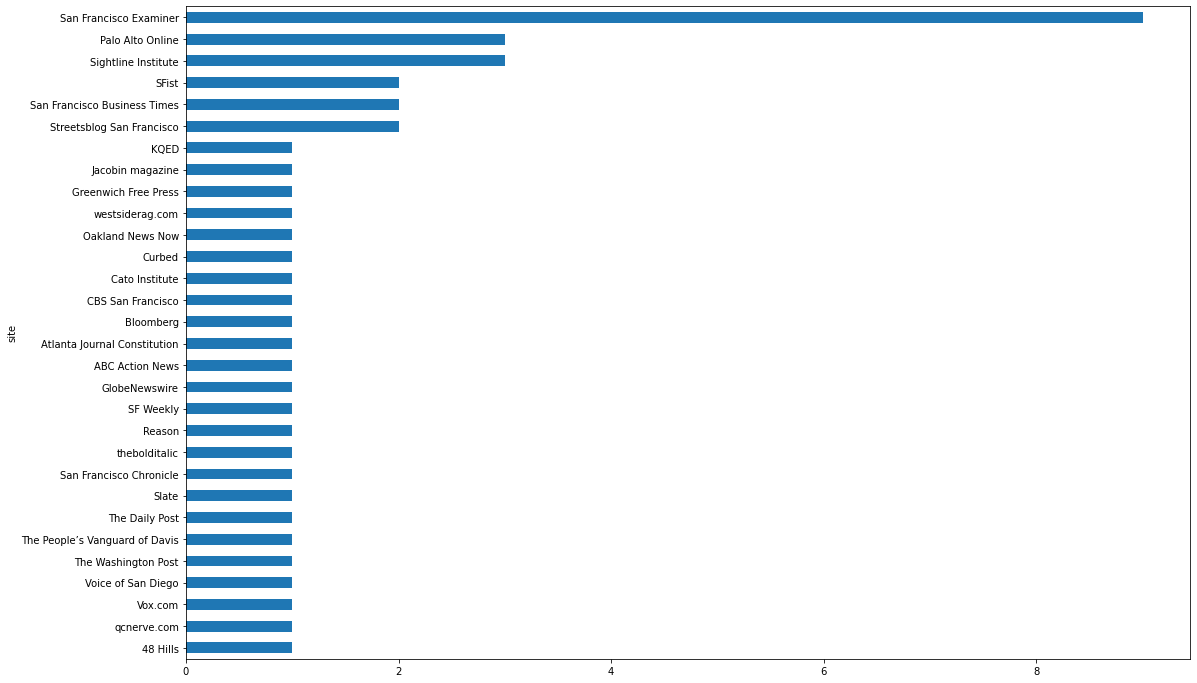

In [13]:
df.groupby('site')['title'].count().sort_values().plot.barh()

### Timeseries analysis

In [14]:
ts = df.set_index('datetime')
count_by_outlet = ts.groupby([pd.Grouper(freq='1M'), 'site'])['title'].count()

<AxesSubplot:xlabel='datetime'>

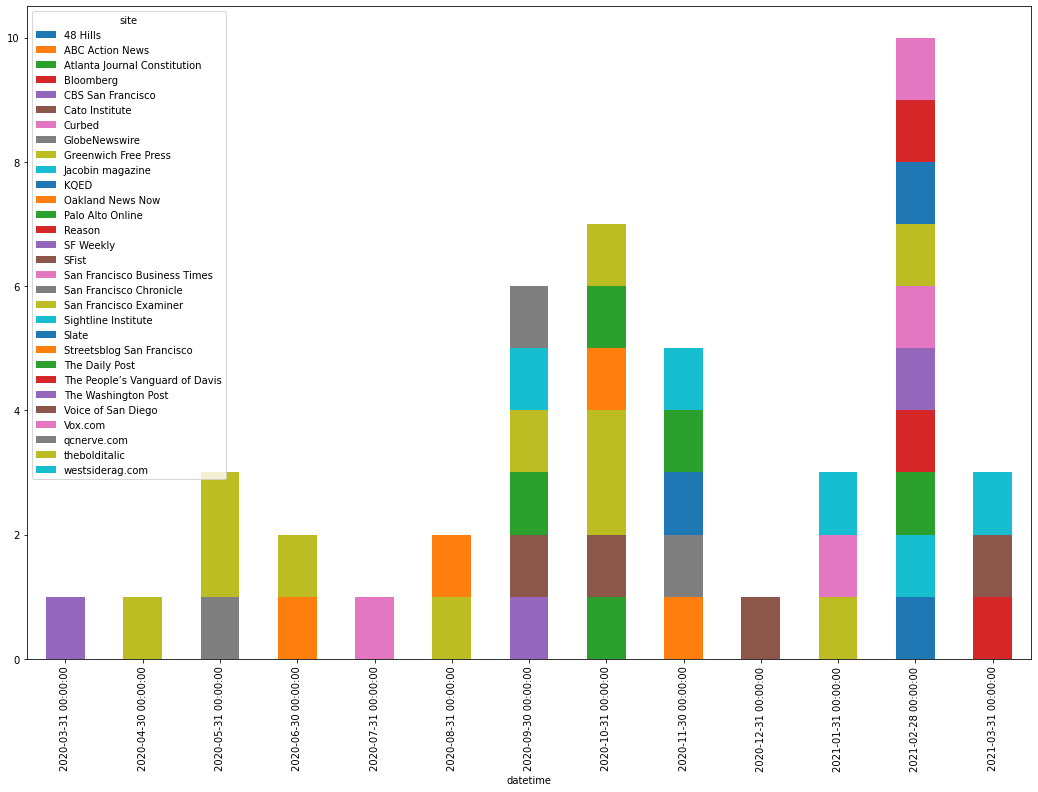

In [15]:
count_by_outlet.unstack().plot.bar(stacked=True)

#### Save timeseries to csv

In [16]:
count_by_outlet.reset_index().rename(columns={'title': 'article_count'}).to_csv('../data/google_news_monthly_timeseries_by_outlet.csv', index=False)


In [17]:
ts.groupby([pd.Grouper(freq='1w')])['title'].count().reset_index().rename(columns={'title': 'article_count'}).to_csv('../data/google_news_weekly_timeseries.csv', index=False)